# Heart Disease Prediction

## Author: Ana Lúcia da Cunha Cox (ana.c.cox@gmail.com)

### Goals
Predict heart disease using differents models. 

### Dataset
This dataset dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

### Data Dictionary
    COLUMN      DESCRIPTION
    age         Person's age in years
    sex         Person's sex (1 - Male or 0 - Female)
    cp          Chest pain type (0 - Typical Angina (Heart related) 1 - Atypical Angina (Non-heart related) 2 - Non-Anginal pain (Non-heart related) 3 - Asymptomatic (No disease))
    trestbps    Resting blood pressure (in mm Hg on admission to the hospital)
    chol        Serum cholestoral in mg/dl (Healthy serum cholesterol is less than 200 mg/dL)
    fbs         Fasting blood sugar > 120 mg/dl (1 - True or 0 - False)
    restecg     Resting electrocardiographic results (values 0,1,2)
    thalach     Maximum heart rate achieved
    exang       Exercise induced angina (1 - Yes or 0 - No)
    oldpeak     Oldpeak = ST depression induced by exercise relative to rest
    slope       The slope of the peak exercise ST segment
    ca          Number of major vessels (0-3) colored by flourosopy
    thal        0 - Normal 1 - Fixed defect 2 - Reversible defect
    target      1 - Heart Problem 0 - No Heart Problem

                            ------------------------------------------------------

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import itertools
from collections import OrderedDict
from sklearn.metrics import confusion_matrix

# 2. Import Datasets

In [2]:
heart = pd.read_csv("C:/Users/Ana Cox/Downloads/heart.csv")

## 2.1. Understanding the dataset 

In [3]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

This dataset has 14 columns(13 of them are float64 and 1 is int64 type) and 1025 rows. There are no missing values.

## 2.2. Data balance

It is important to check that the database is balanced so that there are no problems in the model.

In [6]:
table = pd.concat([pd.DataFrame(heart['target'].value_counts()),
                  pd.DataFrame(heart['target'].value_counts(normalize=True)*100)], 
                  axis=1)

table.columns = ['Qty target', '% target']
table

,Qty target,% target
1,526,51.317073
0,499,48.682927


The dataset is balanced.

## 2.3. Basic statistics 

#### Count
It is the total number of rows.

#### Mean
The "average" number; found by adding all data points and dividing by the number of data points.

#### Standard
The standard deviation is a measure of the amount of variation or dispersion of a set of values.

#### Min
It is the lowest value found in the database

#### 25%
The first quartile is essentially the 25th percentile; i.e 25% of the points in the data fall below that value.

#### 50%
The middle number; found by ordering all data points and picking out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers).The line in the middle is the median value of the data. Median is used over the mean since it is more robust to outlier values. 

#### 75%
The third quartile is the 75th percentile; i.e 75% of the points in the data fall below that value.

#### Max
It is the highest value found in the database. 

In [7]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 2.4. Correlation 

It is a statistical technique that can show whether and how strongly pairs of variables are related.

In [8]:
heart.corr().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.27,0.22,0.12,-0.13,-0.39,0.09,0.21,-0.17,0.27,0.07,-0.23
sex,-0.10,1.00,-0.04,-0.08,-0.20,0.03,-0.06,-0.05,0.14,0.08,-0.03,0.11,0.20,-0.28
cp,-0.07,-0.04,1.00,0.04,-0.08,0.08,0.04,0.31,-0.40,-0.17,0.13,-0.18,-0.16,0.43
trestbps,0.27,-0.08,0.04,1.00,0.13,0.18,-0.12,-0.04,0.06,0.19,-0.12,0.10,0.06,-0.14
chol,0.22,-0.20,-0.08,0.13,1.00,0.03,-0.15,-0.02,0.07,0.06,-0.01,0.07,0.10,-0.10
fbs,0.12,0.03,0.08,0.18,0.03,1.00,-0.10,-0.01,0.05,0.01,-0.06,0.14,-0.04,-0.04
restecg,-0.13,-0.06,0.04,-0.12,-0.15,-0.10,1.00,0.05,-0.07,-0.05,0.09,-0.08,-0.02,0.13
thalach,-0.39,-0.05,0.31,-0.04,-0.02,-0.01,0.05,1.00,-0.38,-0.35,0.40,-0.21,-0.10,0.42
exang,0.09,0.14,-0.40,0.06,0.07,0.05,-0.07,-0.38,1.00,0.31,-0.27,0.11,0.20,-0.44
oldpeak,0.21,0.08,-0.17,0.19,0.06,0.01,-0.05,-0.35,0.31,1.00,-0.58,0.22,0.20,-0.44


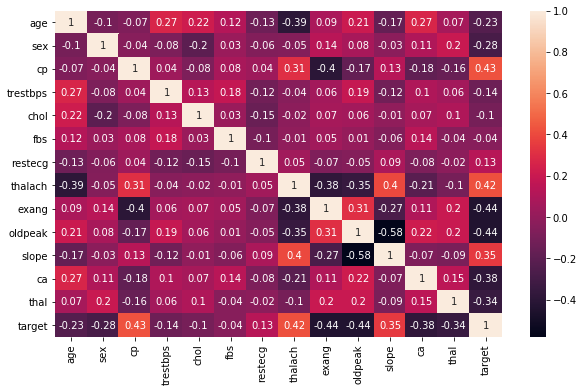

In [9]:
plt.figure(figsize=(10, 6))
heart_corr = heart.corr().round(2)
sns.heatmap(heart_corr, 
            xticklabels = heart_corr.columns.values,
            yticklabels = heart_corr.columns.values,
            annot = True);

#### Checking if there are correlations between variables greater than the statistical magic number 0.7

P.S.: In the case greater than 1, which is the variable with itself. 

In [10]:
(heart_corr > 0.7).sum()

age         1
sex         1
cp          1
trestbps    1
chol        1
fbs         1
restecg     1
thalach     1
exang       1
oldpeak     1
slope       1
ca          1
thal        1
target      1
dtype: int64

## 2.5. Covariance 
It is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.

If the variables have a positive covariance, they tend to show a similar behavior, that is, the lowest (highest) values of variable X correspond to the lowest (highest) of variable Y. If the covariance is negative then the variables tend to show an opposite behavior, that is, the smallest (highest) values of variable X correspond to the largest (smallest) of variable Y.

In [11]:
heart.cov().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.31,-0.43,-0.67,43.09,102.89,0.39,-0.64,-81.45,0.38,2.22,-0.95,2.54,0.41,-1.04
sex,-0.43,0.21,-0.02,-0.64,-4.71,0.00,-0.01,-0.52,0.03,0.05,-0.01,0.05,0.06,-0.06
cp,-0.67,-0.02,1.06,0.69,-4.34,0.03,0.02,7.27,-0.20,-0.21,0.08,-0.19,-0.10,0.22
trestbps,43.09,-0.64,0.69,306.84,115.66,1.14,-1.14,-15.82,0.51,3.86,-1.30,1.89,0.64,-1.22
chol,102.89,-4.71,-4.34,115.66,2661.79,0.50,-4.01,-25.84,1.64,3.93,-0.45,3.95,3.21,-2.58
fbs,0.39,0.00,0.03,1.14,0.50,0.13,-0.02,-0.07,0.01,0.00,-0.01,0.05,-0.01,-0.01
restecg,-0.64,-0.01,0.02,-1.14,-4.01,-0.02,0.28,0.59,-0.02,-0.03,0.03,-0.04,-0.01,0.04
thalach,-81.45,-0.52,7.27,-15.82,-25.84,-0.07,0.59,529.26,-4.14,-9.46,5.62,-4.93,-1.40,4.87
exang,0.38,0.03,-0.20,0.51,1.64,0.01,-0.02,-4.14,0.22,0.17,-0.08,0.05,0.06,-0.10
oldpeak,2.22,0.05,-0.21,3.86,3.93,0.00,-0.03,-9.46,0.17,1.38,-0.42,0.27,0.15,-0.26


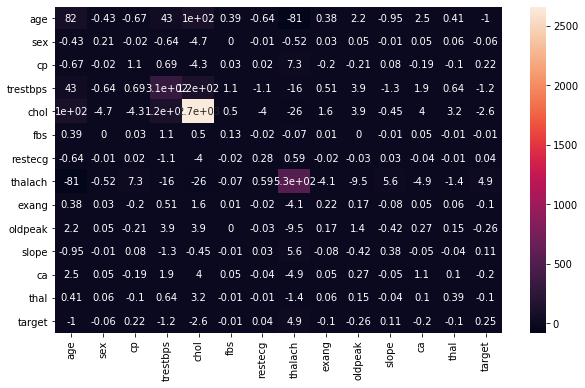

In [12]:
plt.figure(figsize=(10, 6))
heart_cov = heart.cov().round(2)
sns.heatmap(heart_cov, 
            xticklabels = heart_cov.columns.values,
            yticklabels = heart_cov.columns.values,
            annot = True);

# 3. Exploratory Data Analysis 

## 3.1. General Analysis 

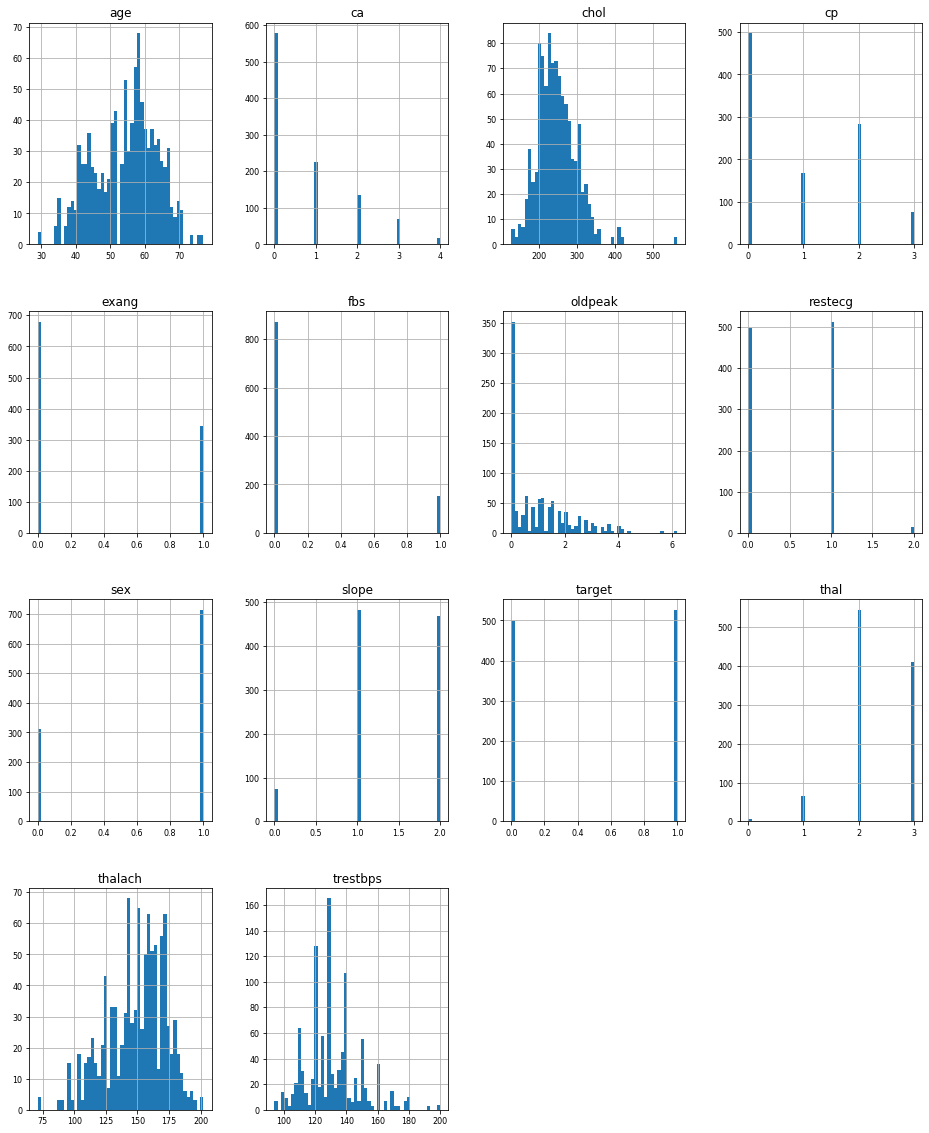

In [13]:
heart.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# 4. Dummy Features

Dummy variables are binary variables (0 or 1) created to represent a variable with two or more categories.

In [14]:
heart_dummies = pd.get_dummies(heart, 
                      columns=['cp','restecg','slope','ca','thal'],
                      drop_first=True, 
                      prefix_sep='_')
heart_dummies.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,0,...,0,1,0,0,0,1,0,0,1,0


In [15]:
heart_dummies.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

#### Obtaining independent data (explanatory variables)

In [16]:
heart_explanatory = heart_dummies

#### Removing the TARGET variable

In [17]:
del heart_explanatory['target'] 
heart_explanatory.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [18]:
heart_target = heart["target"]

# 5. Data Modeling 

## 5.1. Split the dataset into train and test 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(heart_explanatory,
                                                    heart_target,
                                                    test_size = 0.2,
                                                    random_state=0)

In [20]:
print('Dimensions of train and test datasets:\n')
print('Train dataset',x_train.shape)
print('Test dataset desired response',y_test.shape)
print('Test dataset',x_test.shape)
print('Train dataset desired response',y_train.shape)

Dimensions of train and test datasets:

Train dataset (820, 22)
Test dataset desired response (205,)
Test dataset (205, 22)
Train dataset desired response (820,)


#### Proportion of target data in the TRAIN dataset

In [21]:
y_train.value_counts() / len(y_train)

1    0.510976
0    0.489024
Name: target, dtype: float64

#### Proportion of target data in the TEST dataset

In [22]:
y_test.value_counts() / len(y_test)

1    0.521951
0    0.478049
Name: target, dtype: float64

#### Confusion Matrix

In [23]:
def plot_matriz_confusao(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('TARGET')
    plt.xlabel('Models response')

## 6.2. Gaussian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

# Train
y_pred_gaussian_train = gaussian.predict(x_train)
y_score_gaussian_train = gaussian.predict_proba(x_train)

# Test
y_pred_gaussian_test = gaussian.predict(x_test)
y_score_gaussian_test = gaussian.predict_proba(x_test)

#### Accuracy

In [25]:
from sklearn.metrics import accuracy_score

#Train
acc_gaussian_train = round(accuracy_score(y_pred_gaussian_train, y_train) * 100, 2)
print('Train Dataset Accuracy: ',acc_gaussian_train)

#Test
acc_gaussian_test = round(accuracy_score(y_pred_gaussian_test, y_test) * 100, 2)
print('Test Dataset Accuracy: ',acc_gaussian_test)

Train Dataset Accuracy:  83.78
Test Dataset Accuracy:  86.83


#### Area Under ROC

In [26]:
from sklearn.metrics import roc_curve, auc

# Train
fpr_gaussian_train, tpr_gaussian_train, thresholds = roc_curve(y_train, y_score_gaussian_train[:,1])
roc_auc_gaussian_train = 100*round(auc(fpr_gaussian_train, tpr_gaussian_train), 2)
print('Train Dataset Area Under ROC: ',roc_auc_gaussian_train)

# Test
fpr_gaussian_test, tpr_gaussian_test, thresholds = roc_curve(y_test, y_score_gaussian_test[:,1])
roc_auc_gaussian_test = 100*round(auc(fpr_gaussian_test, tpr_gaussian_test), 2)
print('Test Dataset Area Under ROC: ',roc_auc_gaussian_test)

Train Dataset Area Under ROC:  90.0
Test Dataset Area Under ROC:  93.0


#### Gini Curve

In [27]:
from sklearn.metrics import roc_curve, auc

# Train
gini_gaussian_train = 100*round((2*roc_auc_gaussian_train/100 - 1), 2)
print('Train Dataset Gini: ',gini_gaussian_train)

# Test
gini_gaussian_test = 100*round((2*roc_auc_gaussian_test/100 - 1), 2)
print('Test Dataset Gini: ',gini_gaussian_test)

Train Dataset Gini:  80.0
Test Dataset Gini:  86.0


#### Confision matrix

Confusion matrix without normalization


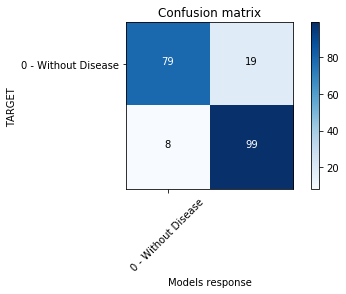

In [28]:
matrix = confusion_matrix(y_test, y_pred_gaussian_test)
np.set_printoptions(precision=2)

plt.figure()
plot_matriz_confusao(matrix, classes=["0 - Without Disease"],
                      title='Confusion matrix')
plt.show()

#### Cross Validation Classification Report

In [29]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_gaussian_test)
print('\n\nCross Validation Classification Report:\n',report)



Cross Validation Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.85        98
           1       0.84      0.93      0.88       107

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



## 6.3. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)


# Treino
y_pred_logreg_train = logreg.predict(x_train)
y_score_logreg_train = logreg.predict_proba(x_train)

# Teste
y_pred_logreg_test = logreg.predict(x_test)
y_score_logreg_test = logreg.predict_proba(x_test)

C:\Users\Ana Cox\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Accuracy

In [31]:
from sklearn.metrics import accuracy_score

#Treino
acc_logreg_train = round(accuracy_score(y_pred_logreg_train, y_train) * 100, 2)
print('Train Dataset Accuracy: ',acc_logreg_train)


#Teste
acc_logreg_test = round(accuracy_score(y_pred_logreg_test, y_test) * 100, 2)
print('Test Dataset Accuracy: ',acc_logreg_test)

Train Dataset Accuracy:  86.34
Test Dataset Accuracy:  88.29


#### Area Under ROC

In [32]:
from sklearn.metrics import roc_curve, auc

# Treino
fpr_logreg_train, tpr_logreg_train, thresholds = roc_curve(y_train, y_score_logreg_train[:,1])
roc_auc_logreg_train = 100*round(auc(fpr_logreg_train, tpr_logreg_train), 2)
print('Train Dataset Accuracy: ',roc_auc_logreg_train)

# Teste
fpr_logreg_test, tpr_logreg_test, thresholds = roc_curve(y_test, y_score_logreg_test[:,1])
roc_auc_logreg_test = 100*round(auc(fpr_logreg_test, tpr_logreg_test), 2)
print('Test Dataset Accuracy: ',roc_auc_logreg_test)

Train Dataset Accuracy:  93.0
Test Dataset Accuracy:  95.0


#### Gini Curve

In [33]:
from sklearn.metrics import roc_curve, auc

# Train
gini_logreg_train = 100*round((2*roc_auc_logreg_train/100 - 1), 2)
print('Train Dataset Accuracy: ',gini_logreg_train)

# Test
gini_logreg_test = 100*round((2*roc_auc_logreg_test/100 - 1), 2)
print('Test Dataset Accuracy: ',gini_logreg_test)

Train Dataset Accuracy:  86.0
Test Dataset Accuracy:  90.0


#### Confusion Matrix

Confusion matrix without normalization


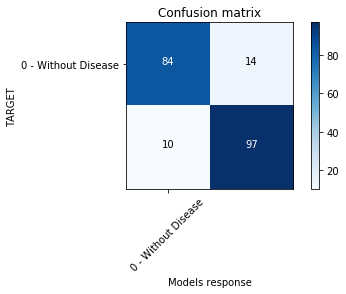

In [34]:
matrix = confusion_matrix(y_test, y_pred_logreg_test)
np.set_printoptions(precision=2)

plt.figure()
plot_matriz_confusao(matrix, classes=["0 - Without Disease"],
                      title='Confusion matrix')
plt.show()

#### Cross Validation Classification Report

In [35]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_logreg_test)
print('\n\nCross Validation Classification Report:\n',report)



Cross Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        98
           1       0.87      0.91      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



## 6.4. Support Vector Machines

In [36]:
from sklearn.svm import SVC
import numpy as np

svc = SVC()

svc.fit(x_train, y_train)

# Train
y_pred_svc_train = svc.predict(x_train) 
y_score_svc_train = 1/(1+np.exp(-svc.decision_function(x_train))) #Converts to probability

# Test
y_pred_svc_test = svc.predict(x_test)
y_score_svc_test = 1/(1+np.exp(-svc.decision_function(x_test))) #Converts to probability

#### Accuracy

In [37]:
from sklearn.metrics import accuracy_score

#Train
acc_svc_train = round(accuracy_score(y_pred_svc_train, y_train) * 100, 2)
print('Train Dataset Accuracy: ',acc_svc_train)

#Test
acc_svc_test = round(accuracy_score(y_pred_svc_test, y_test) * 100, 2)
print('Test Dataset Accuracy: ',acc_svc_test)

Train Dataset Accuracy:  70.24
Test Dataset Accuracy:  74.63


#### Area Under ROC

In [38]:
from sklearn.metrics import roc_curve, auc

# Train
fpr_svc_train, tpr_svc_train, thresholds = roc_curve(y_train, y_score_svc_train)
roc_auc_svc_train = 100*round(auc(fpr_svc_train, tpr_svc_train), 2)
print('Train Dataset Accuracy: ',roc_auc_svc_train)

# Test
fpr_svc_test, tpr_svc_test, thresholds = roc_curve(y_test, y_score_svc_test)
roc_auc_svc_test = 100*round(auc(fpr_svc_test, tpr_svc_test), 2)
print('Test Dataset Accuracy: ',roc_auc_svc_test)

Train Dataset Accuracy:  75.0
Test Dataset Accuracy:  80.0


#### Gini Curve

In [39]:
from sklearn.metrics import roc_curve, auc

# Train
gini_svc_train = 100*round((2*roc_auc_svc_train/100 - 1), 2)
print('Train Dataset Accuracy: ',gini_svc_train)

# Test
gini_svc_test = 100*round((2*roc_auc_svc_test/100 - 1), 2)
print('Test Dataset Accuracy: ',gini_svc_test)

Train Dataset Accuracy:  50.0
Test Dataset Accuracy:  60.0


#### Confusion Matrix

Confusion matrix without normalization


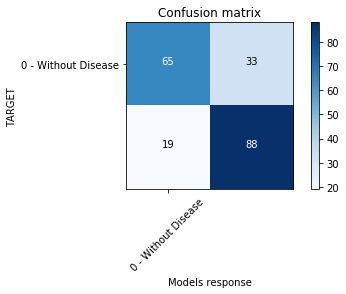

In [40]:
matrix = confusion_matrix(y_test, y_pred_svc_test)
np.set_printoptions(precision=2)

plt.figure()
plot_matriz_confusao(matrix, classes=["0 - Without Disease"],
                      title='Confusion matrix')
plt.show()

#### Cross Validation Classification Report

In [41]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_svc_test)
print('\n\nCross Validation Classification Report:\n',report)



Cross Validation Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.66      0.71        98
           1       0.73      0.82      0.77       107

    accuracy                           0.75       205
   macro avg       0.75      0.74      0.74       205
weighted avg       0.75      0.75      0.74       205



## 6.5. Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(criterion='entropy',
                                 max_depth=8,
                                 random_state=123)
dectree.fit(x_train, y_train)


# Train
y_pred_dectree_train = dectree.predict(x_train)
y_score_dectree_train = dectree.predict_proba(x_train)[:,1]

# Test
y_pred_dectree_test = dectree.predict(x_test)
y_score_dectree_test = dectree.predict_proba(x_test)[:,1]

#### Accuracy

In [43]:
from sklearn.metrics import accuracy_score

#Train
acc_dectree_train = round(accuracy_score(y_pred_dectree_train, y_train) * 100, 2)
print('Train Dataset Accuracy: ',acc_dectree_train)

#Test
acc_dectree_test = round(accuracy_score(y_pred_dectree_test, y_test) * 100, 2)
print('Test Dataset Accuracy: ',acc_dectree_test)

Train Dataset Accuracy:  94.88
Test Dataset Accuracy:  95.61


#### Area Under ROC

In [44]:
from sklearn.metrics import roc_curve, auc

# Train
fpr_dectree_train, tpr_dectree_train, thresholds = roc_curve(y_train, y_score_dectree_train)
roc_auc_dectree_train = 100*round(auc(fpr_dectree_train, tpr_dectree_train), 2)
print('Train Dataset Area Under ROC: ',roc_auc_dectree_train)

# Test
fpr_dectree_test, tpr_dectree_test, thresholds = roc_curve(y_test, y_score_dectree_test)
roc_auc_dectree_test = 100*round(auc(fpr_dectree_test, tpr_dectree_test), 2)
print('Test Dataset Area Under ROC: ',roc_auc_dectree_test)

Train Dataset Area Under ROC:  99.0
Test Dataset Area Under ROC:  99.0


#### Gini Curve

In [45]:
from sklearn.metrics import roc_curve, auc

# Train
gini_dectree_train = 100*round((2*roc_auc_dectree_train/100 - 1), 2)
print('Train Dataset Gini Curve: ',gini_dectree_train)

# Test
gini_dectree_test = 100*round((2*roc_auc_dectree_test/100 - 1), 2)
print('Test Dataset Gini Curve: ',gini_dectree_test)

Train Dataset Gini Curve:  98.0
Test Dataset Gini Curve:  98.0


#### Confusion matrix

Confusion matrix without normalization


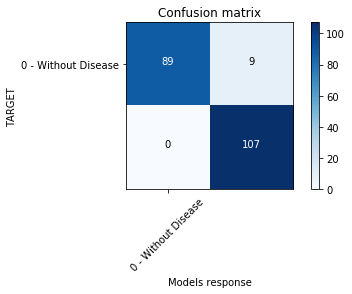

In [46]:
matrix = confusion_matrix(y_test, y_pred_dectree_test)
np.set_printoptions(precision=2)

plt.figure()
plot_matriz_confusao(matrix, classes=["0 - Without Disease"],
                      title='Confusion matrix')
plt.show()

#### Cross Validation Classification Report

In [47]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_dectree_test)
print('\n\nCross Validation Classification Report:\n',report)



Cross Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        98
           1       0.92      1.00      0.96       107

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.96       205
weighted avg       0.96      0.96      0.96       205



## 6.6. Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier


rndforest = RandomForestClassifier(criterion='entropy',
                                 max_depth=8,
                                 random_state=123)

rndforest.fit(x_train, y_train)

# Train
y_pred_rndforest_train = rndforest.predict(x_train)
y_score_rndforest_train = rndforest.predict_proba(x_train)[:,1]

# Test
y_pred_rndforest_test = rndforest.predict(x_test)
y_score_rndforest_test = rndforest.predict_proba(x_test)[:,1]

#### Accuracy

In [49]:
from sklearn.metrics import accuracy_score

#Train
acc_rndforest_train = round(accuracy_score(y_pred_rndforest_train, y_train) * 100, 2)
print('Train Dataset Accuracy: ',acc_rndforest_train)

#Test
acc_rndforest_test = round(accuracy_score(y_pred_rndforest_test, y_test) * 100, 2)
print('Test Dataset Accuracy: ',acc_rndforest_test)

Train Dataset Accuracy:  99.63
Test Dataset Accuracy:  99.51


#### Area Under ROC

In [50]:
from sklearn.metrics import roc_curve, auc

# Train
fpr_rndforest_train, tpr_rndforest_train, thresholds = roc_curve(y_train, y_score_rndforest_train)
roc_auc_rndforest_train = 100*round(auc(fpr_rndforest_train, tpr_rndforest_train), 2)
print('Train Dataset Area Under ROC: ',roc_auc_rndforest_train)

# Test
fpr_rndforest_test, tpr_rndforest_test, thresholds = roc_curve(y_test, y_score_rndforest_test)
roc_auc_rndforest_test = 100*round(auc(fpr_rndforest_test, tpr_rndforest_test), 2)
print('Test Dataset Area Under ROC: ',roc_auc_rndforest_test)

Train Dataset Area Under ROC:  100.0
Test Dataset Area Under ROC:  100.0


#### Gini Curve

In [51]:
from sklearn.metrics import roc_curve, auc

# Train
gini_rndforest_train = 100*round((2*roc_auc_rndforest_train/100 - 1), 2)
print('Train Dataset Gini Curve: ',gini_rndforest_train)

# Test
gini_rndforest_test = 100*round((2*roc_auc_rndforest_test/100 - 1), 2)
print('Test Dataset Gini Curve: ',gini_rndforest_test)

Train Dataset Gini Curve:  100.0
Test Dataset Gini Curve:  100.0


#### Confusion Matrix

Confusion matrix without normalization


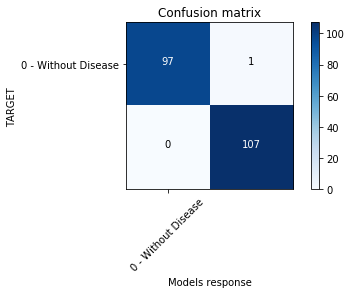

In [52]:
matrix = confusion_matrix(y_test, y_pred_rndforest_test)
np.set_printoptions(precision=2)

plt.figure()
plot_matriz_confusao(matrix, classes=["0 - Without Disease"],
                      title='Confusion matrix')
plt.show()

#### Cross Validation Classification Report

In [53]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_rndforest_test)
print('\n\nCross Validation Classification Report:\n',report)



Cross Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       0.99      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      0.99      1.00       205
weighted avg       1.00      1.00      1.00       205



## 6.7. Gradient Boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(x_train, y_train)

# Train
y_pred_gbc_train = gbc.predict(x_train)
y_score_gbc_train = gbc.predict_proba(x_train)[:,1]

# Test
y_pred_gbc_test = gbc.predict(x_test)
y_score_gbc_test = gbc.predict_proba(x_test)[:,1]

#### Accuracy

In [55]:
from sklearn.metrics import accuracy_score

#Train
acc_gbc_train = round(accuracy_score(y_pred_gbc_train, y_train) * 100, 2)
print('Train Dataset Accuracy: ',acc_gbc_train)

#Test
acc_gbc_test = round(accuracy_score(y_pred_gbc_test, y_test) * 100, 2)
print('Test Dataset Accuracy: ',acc_gbc_test)

Train Dataset Accuracy:  99.39
Test Dataset Accuracy:  99.02


#### Area Under ROC

In [56]:
from sklearn.metrics import roc_curve, auc

# Train
fpr_gbc_train, tpr_gbc_train, thresholds = roc_curve(y_train, y_score_gbc_train)
roc_auc_gbc_train = 100*round(auc(fpr_gbc_train, tpr_gbc_train), 2)
print('Train Dataset Area Under ROC: ',roc_auc_gbc_train)

# Test
fpr_gbc_test, tpr_gbc_test, thresholds = roc_curve(y_test, y_score_gbc_test)
roc_auc_gbc_test = 100*round(auc(fpr_gbc_test, tpr_gbc_test), 2)
print('Test Dataset Area Under ROC: ',roc_auc_gbc_test)

Train Dataset Area Under ROC:  100.0
Test Dataset Area Under ROC:  100.0


#### Gini Curve

In [57]:
from sklearn.metrics import roc_curve, auc

# Train
gini_gbc_train = 100*round((2*roc_auc_gbc_train/100 - 1), 2)
print('Train Dataset Gini Curve: ',gini_gbc_train)

# Test
gini_gbc_test = 100*round((2*roc_auc_gbc_test/100 - 1), 2)
print('Test Dataset Gini Curve: ',gini_gbc_test)

Train Dataset Gini Curve:  100.0
Test Dataset Gini Curve:  100.0


#### Confusion Matrix

Confusion matrix without normalization


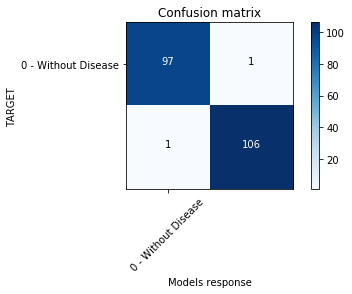

In [58]:
matrix = confusion_matrix(y_test, y_pred_gbc_test)
np.set_printoptions(precision=2)

plt.figure()
plot_matriz_confusao(matrix, classes=["0 - Without Disease"],
                      title='Confusion matrix')
plt.show()

#### Cross Validation Classification Report

In [59]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_gbc_test)
print('\n\nCross Validation Classification Report:\n',report)



Cross Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        98
           1       0.99      0.99      0.99       107

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# 7. Evaluation of the models and choice of the winner

In [60]:
models = pd.DataFrame({
    'Model': ['Naive Bayes', 
              'Logistic Regression',
              'Support Vector Machines',
              'Decision Tree', 
              'Random Forest', 
              'Gradient Boosting'],
    
     'Accuracy_Train': [acc_gaussian_train,
                        acc_logreg_train,
                        acc_svc_train,
                        acc_dectree_train,
                        acc_rndforest_train,
                        acc_gbc_train],   
    
    
    'Accuracy_Test': [acc_gaussian_test,
                      acc_logreg_test,
                      acc_svc_test,
                      acc_dectree_test,
                      acc_rndforest_test,
                      acc_gbc_test]

})
model_comp = models.sort_values(by='Accuracy_Test', ascending=False)
model_comp = model_comp[['Model','Accuracy_Train','Accuracy_Test']]
model_comp

,Model,Accuracy_Train,Accuracy_Test
4,Random Forest,99.63,99.51
5,Gradient Boosting,99.39,99.02
3,Decision Tree,94.88,95.61
1,Logistic Regression,86.34,88.29
0,Naive Bayes,83.78,86.83
2,Support Vector Machines,70.24,74.63


The most accurate model was RANDOM FOREST!

## 7.1. Importance of variables according to the model

#### Random Forest

In [61]:
print ('Order of importance of variables for the Random Forest model:')
df = pd.DataFrame(OrderedDict({'Features':x_train.columns,'Importance':rndforest.feature_importances_}))
df = df.sort_values(by='Importance', ascending=False)
df.head(100)

Order of importance of variables for the Random Forest model:


,Features,Importance
5,thalach,0.141877
7,oldpeak,0.102859
0,age,0.092139
3,chol,0.079872
2,trestbps,0.074479
21,thal_3,0.073694
20,thal_2,0.073098
6,exang,0.063365
15,ca_1,0.041028
1,sex,0.039832


#### Gradient Boosting

In [62]:
print ('Order of importance of variables for the Gradient Boosting model:')
df = pd.DataFrame(OrderedDict({'Features':x_train.columns,'Importance':gbc.feature_importances_}))
df = df.sort_values(by='Importance', ascending=False)
df.head(100)

Order of importance of variables for the Gradient Boosting model:


,Features,Importance
20,thal_2,0.209101
7,oldpeak,0.124756
5,thalach,0.110288
3,chol,0.090803
0,age,0.085302
6,exang,0.070750
15,ca_1,0.047436
9,cp_2,0.046236
2,trestbps,0.041025
10,cp_3,0.031251


#### Decision Tree

In [63]:
print ('Order of importance of variables for the Decision Tree model:')

df = pd.DataFrame(OrderedDict({'Features':x_train.columns,'Importance':dectree.feature_importances_}))
df = df.sort_values(by='Importance', ascending=False)
df.head(100)

Order of importance of variables for the Decision Tree model:


,Features,Importance
20,thal_2,0.209318
0,age,0.193315
7,oldpeak,0.146197
5,thalach,0.109925
2,trestbps,0.077430
3,chol,0.076719
15,ca_1,0.039710
1,sex,0.039095
9,cp_2,0.036533
10,cp_3,0.029560


# 8. Save the model in disk (local)

In [64]:
import pickle

filename = 'Winner_Model_Heart_Disease.pkl'
pickle.dump(gbc, open(filename, 'wb'))